# Found Data & Pandas Fundamentals
## Your First Steps into Cultural Data Analysis

Welcome to the exciting world of **found data** - information that already exists in the world, waiting to be discovered and analyzed! Today we'll explore how to work with cultural datasets using Python's most powerful data analysis tool: **pandas**.

### 📚 How This Lesson Works:
This is a **demonstration and learning notebook**. We'll walk through pandas fundamentals using example datasets and guided practice.

**🎯 Ready to practice with your own data?** After this lesson, use the companion **Student Practice Notebook**:
- **📝 `WRIT20833_HW3-1Found_Data_Practice.ipynb`** (in the homework folder)
- Apply these skills to your own cultural dataset
- Complete guided exercises and reflection questions
- Submit your analysis for assessment

### What is "Found Data"?
Found data includes:
- **Public datasets** from sites like Kaggle, government databases, or academic repositories
- **Scraped data** collected from websites (when ethically and legally permissible)
- **Digital collections** from libraries, museums, and cultural institutions
- **Social media data** and other user-generated content

This type of data offers incredible opportunities for cultural analysis, but it comes with important ethical considerations.

### 📝 What Makes Data Good for Pandas Analysis?
**For this lesson, you'll want datasets that include:**
- **Rich text data**: Names, titles, descriptions, categories, locations
- **Mixed data types**: Combination of text, numbers, dates, and categories
- **Some numeric columns**: For calculations, filtering, and visualization
- **Categorical information**: Genres, types, classifications that can be grouped and compared

**Examples of ideal cultural datasets:**
- Movie/book databases with titles, genres, years, ratings
- Museum collections with artist names, artwork titles, dates, mediums
- Music datasets with song titles, artists, albums, genres, duration
- Historical records with names, places, dates, events

## Part 1: Understanding Found Data & Data Collection Ethics

### Found Data: Where Culture Lives in Data Form

"Found data" refers to datasets that already exist and can be discovered, rather than data you collect yourself through surveys or experiments. For cultural analysis, found data is everywhere:

**Major Sources of Cultural Found Data:**
- **Kaggle** (kaggle.com): Thousands of datasets on everything from movie ratings to historical census data
- **Government Open Data**: Census data, cultural funding records, historical immigration data
- **Institutional Repositories**: Museum collections, library catalogs, university digital archives
- **APIs**: Twitter, Instagram, YouTube (for contemporary cultural analysis)
- **Scraped Data**: Information extracted from websites using tools like browser extensions

### Web Scraping and Browser Extensions

Sometimes the data you need isn't available as a download - it's displayed on websites. **Browser extensions** like "Instant Data Scraper" can help extract data from web pages into spreadsheet format. However, this power comes with important responsibilities.

### Understanding robots.txt: The Web's Ethical Guidelines

Before scraping any website, you should check its **robots.txt** file - a text file that tells automated programs (like scrapers) what they're allowed to access.

**How to check robots.txt:**
Add `/robots.txt` to any website's main URL:
- `https://example.com/robots.txt`
- `https://archive.org/robots.txt`
- `https://www.nytimes.com/robots.txt`

**What robots.txt tells us:**
```
User-agent: *          # Rules for all bots
Disallow: /private/    # Don't access this directory
Allow: /public/        # This area is okay
Crawl-delay: 10        # Wait 10 seconds between requests
```

### Robots.txt in the Age of AI and LLMs

The emergence of Large Language Models (LLMs) like ChatGPT has sparked new debates about robots.txt:

**Traditional robots.txt** was designed for search engines and researchers doing small-scale scraping.

**AI training concerns**: Many websites now worry about their content being scraped to train commercial AI models without compensation or attribution.

**New considerations**:
- Some sites are updating robots.txt to specifically block AI training bots
- Legal questions about whether robots.txt applies to AI training data collection
- Ethical debates about consent, fair use, and intellectual property

**Best practices for cultural researchers**:
1. Always check and respect robots.txt
2. Consider the scale and purpose of your data collection
3. Give attribution to data sources
4. When in doubt, contact the website owner
5. Be transparent about your research methods

Now let's practice working with found data using Pandas!

## Part 2: Setting Up Pandas

Pandas is Python's most powerful library for working with tabular data (like spreadsheets and CSV files). It's named after "panel data" but we like to think of it as our friendly data-handling panda.

In [1]:
# Import pandas and give it a nickname
import pandas as pd

# The 'pd' nickname is a universal convention - every pandas user recognizes it!

In [3]:
# Let's also import matplotlib for making plots
import matplotlib.pyplot as plt

# Set up pandas to show more rows and columns when displaying data
pd.options.display.max_rows = 100
pd.options.display.max_columns = 20

## Part 3: Reading in Found Data

Let's start with a cultural dataset! We'll use data about global museum attendance that represents the kind of "found data" you might discover on Kaggle or government cultural databases.

*Note: In a real research context, you would download CSV files from sources like Kaggle, then upload them to your workspace. For this lesson, we'll create a sample dataset to practice with.*

In [5]:
# Create a sample cultural dataset to practice with
# This simulates data you might find on Kaggle about museum attendance

sample_cultural_data = {
    'museum_name': ['Metropolitan Museum of Art', 'Louvre', 'British Museum', 'National Gallery', 'Tate Modern',
                   'Museum of Modern Art', 'National Museum of Natural History', 'Vatican Museums', 'Rijksmuseum', 'Uffizi Gallery'],
    'city': ['New York', 'Paris', 'London', 'London', 'London',
            'New York', 'Washington DC', 'Vatican City', 'Amsterdam', 'Florence'],
    'country': ['USA', 'France', 'UK', 'UK', 'UK',
               'USA', 'USA', 'Vatican', 'Netherlands', 'Italy'],
    'annual_visitors': [6700000, 8900000, 6820000, 6011000, 5868000,
                       2788000, 7100000, 6883000, 2300000, 4400000],
    'founded_year': [1870, 1793, 1753, 1824, 2000,
                    1929, 1910, 1506, 1800, 1581],
    'museum_type': ['Art', 'Art', 'Cultural History', 'Art', 'Modern Art',
                   'Modern Art', 'Natural History', 'Art', 'Art & History', 'Art']
}

# Convert to a pandas DataFrame
museums_df = pd.DataFrame(sample_cultural_data)

print("✅ Sample cultural dataset created!")
print(f"Dataset contains {len(museums_df)} museums")

✅ Sample cultural dataset created!
Dataset contains 10 museums


### Exploring Our Cultural Dataset

When working with found data, your first step should always be **exploration** - understanding what you have before you start analyzing.

In [6]:
# Display the entire dataset
museums_df

,museum_name,city,country,annual_visitors,founded_year,museum_type
0,Metropolitan Museum of Art,New York,USA,6700000,1870,Art
1,Louvre,Paris,France,8900000,1793,Art
2,British Museum,London,UK,6820000,1753,Cultural History
3,National Gallery,London,UK,6011000,1824,Art
4,Tate Modern,London,UK,5868000,2000,Modern Art
5,Museum of Modern Art,New York,USA,2788000,1929,Modern Art
6,National Museum of Natural History,Washington DC,USA,7100000,1910,Natural History
7,Vatican Museums,Vatican City,Vatican,6883000,1506,Art
8,Rijksmuseum,Amsterdam,Netherlands,2300000,1800,Art & History
9,Uffizi Gallery,Florence,Italy,4400000,1581,Art


In [8]:
# Look at the first few rows
museums_df.head()

,museum_name,city,country,annual_visitors,founded_year,museum_type
0,Metropolitan Museum of Art,New York,USA,6700000,1870,Art
1,Louvre,Paris,France,8900000,1793,Art
2,British Museum,London,UK,6820000,1753,Cultural History
3,National Gallery,London,UK,6011000,1824,Art
4,Tate Modern,London,UK,5868000,2000,Modern Art


In [9]:
# Look at a random sample
museums_df.sample(3)

,museum_name,city,country,annual_visitors,founded_year,museum_type
5,Museum of Modern Art,New York,USA,2788000,1929,Modern Art
4,Tate Modern,London,UK,5868000,2000,Modern Art
9,Uffizi Gallery,Florence,Italy,4400000,1581,Art


### Understanding Your Data Structure

In [10]:
# Get basic info about the dataset
museums_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   museum_name      10 non-null     object
 1   city             10 non-null     object
 2   country          10 non-null     object
 3   annual_visitors  10 non-null     int64 
 4   founded_year     10 non-null     int64 
 5   museum_type      10 non-null     object
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


In [11]:
# Check the shape (rows, columns)
print(f"Shape: {museums_df.shape}")
print(f"This dataset has {museums_df.shape[0]} rows and {museums_df.shape[1]} columns")

Shape: (10, 6)
This dataset has 10 rows and 6 columns


In [12]:
# See column names
print("Column names:")
print(museums_df.columns.tolist())

Column names:
['museum_name', 'city', 'country', 'annual_visitors', 'founded_year', 'museum_type']


In [13]:
# Get summary statistics for numerical columns
museums_df.describe()

,annual_visitors,founded_year
count,1.000000e+01,10.000000
mean,5.777000e+06,1796.600000
std,2.045301e+06,153.027376
min,2.300000e+06,1506.000000
25%,4.767000e+06,1763.000000
50%,6.355500e+06,1812.000000
75%,6.867250e+06,1900.000000
max,8.900000e+06,2000.000000


### 🤔 Questions for Discussion:

Looking at this cultural data:
1. What patterns do you notice in museum locations?
2. Which museums are the oldest? The newest?
3. What might the visitor numbers tell us about cultural tourism?
4. How might this data be biased or incomplete?

## Part 4: Working with Your Own Found Data

Now it's your turn! If you have found data from Kaggle, a government database, or scraped from a website, upload it and we'll explore it together.

### Reading CSV Files from Various Sources

```python
# Template for reading your found data:
# your_data = pd.read_csv('your_filename.csv')

# For files with different encodings (common with international data):
# your_data = pd.read_csv('your_filename.csv', encoding='utf-8')

# For files with different separators:
# your_data = pd.read_csv('your_filename.csv', delimiter=';')  # For semicolon-separated
```

In [ ]:
# Space for reading in your own found data
# Uncomment and modify the line below to read your CSV file:

# my_found_data = pd.read_csv('your_filename.csv')
# print(f"Successfully loaded data with {len(my_found_data)} rows!")
# my_found_data.head()

In [ ]:
# Explore your found data here
# my_found_data.info()
# my_found_data.describe()
# my_found_data.sample(5)

## Part 5: Selecting and Filtering Cultural Data

Once you understand your dataset, you'll want to focus on specific aspects. Let's learn how to select columns and filter rows.

### Selecting Columns

In [14]:
# Select a single column (this creates a pandas Series)
museum_names = museums_df['museum_name']
print(type(museum_names))
print("\nMuseum names:")
print(museum_names)

<class 'pandas.core.series.Series'>

Museum names:
0            Metropolitan Museum of Art
1                                Louvre
2                        British Museum
3                      National Gallery
4                           Tate Modern
5                  Museum of Modern Art
6    National Museum of Natural History
7                       Vatican Museums
8                           Rijksmuseum
9                        Uffizi Gallery
Name: museum_name, dtype: object


In [15]:
# Select multiple columns (this creates a DataFrame)
basic_info = museums_df[['museum_name', 'city', 'annual_visitors']]
print(type(basic_info))
print("\nBasic museum information:")
basic_info

<class 'pandas.core.frame.DataFrame'>

Basic museum information:


,museum_name,city,annual_visitors
0,Metropolitan Museum of Art,New York,6700000
1,Louvre,Paris,8900000
2,British Museum,London,6820000
3,National Gallery,London,6011000
4,Tate Modern,London,5868000
5,Museum of Modern Art,New York,2788000
6,National Museum of Natural History,Washington DC,7100000
7,Vatican Museums,Vatican City,6883000
8,Rijksmuseum,Amsterdam,2300000
9,Uffizi Gallery,Florence,4400000


### Filtering Rows (Boolean Indexing)

This is where cultural analysis gets interesting! We can filter data to focus on specific subsets.

In [ ]:
# Filter for museums in a specific city
london_museums = museums_df[museums_df['city'] == 'London']
print(f"Museums in London: {len(london_museums)}")
london_museums

In [17]:
# Filter for highly visited museums (more than 6 million visitors)
popular_museums = museums_df[museums_df['annual_visitors'] > 6000000]
print(f"Museums with >6M annual visitors: {len(popular_museums)}")
popular_museums[['museum_name', 'city', 'annual_visitors']]

Museums with >6M annual visitors: 6


,museum_name,city,annual_visitors
0,Metropolitan Museum of Art,New York,6700000
1,Louvre,Paris,8900000
2,British Museum,London,6820000
3,National Gallery,London,6011000
6,National Museum of Natural History,Washington DC,7100000
7,Vatican Museums,Vatican City,6883000


In [18]:
# Filter for older museums (founded before 1800)
historic_museums = museums_df[museums_df['founded_year'] < 1800]
print(f"Museums founded before 1800: {len(historic_museums)}")
historic_museums[['museum_name', 'founded_year', 'country']]

Museums founded before 1800: 4


,museum_name,founded_year,country
1,Louvre,1793,France
2,British Museum,1753,UK
7,Vatican Museums,1506,Vatican
9,Uffizi Gallery,1581,Italy


In [19]:
# Multiple conditions: Art museums in Europe with high attendance
european_countries = ['France', 'UK', 'Netherlands', 'Italy']
european_art_museums = museums_df[
    (museums_df['country'].isin(european_countries)) &
    (museums_df['museum_type'] == 'Art') &
    (museums_df['annual_visitors'] > 4000000)
]
print(f"Popular European art museums: {len(european_art_museums)}")
european_art_museums

Popular European art museums: 3


,museum_name,city,country,annual_visitors,founded_year,museum_type
1,Louvre,Paris,France,8900000,1793,Art
3,National Gallery,London,UK,6011000,1824,Art
9,Uffizi Gallery,Florence,Italy,4400000,1581,Art


### 🔍 Practice with Your Data:

Try filtering your own found data! Some ideas:
- Find rows that meet specific criteria relevant to your cultural question
- Filter by date ranges, geographic locations, or categories
- Combine multiple conditions to focus on interesting subsets

In [ ]:
# Practice filtering your own data here
# Example template:
# filtered_data = my_found_data[my_found_data['column_name'] == 'some_value']
# filtered_data.head()

## Part 6: Counting and Analyzing Patterns

One of the most powerful features for cultural analysis is counting patterns in your data.

In [21]:
# Count unique values in categorical columns
print("Museums by country:")
country_counts = museums_df['country'].value_counts()
print(country_counts)

Museums by country:
country
USA            3
UK             3
France         1
Vatican        1
Netherlands    1
Italy          1
Name: count, dtype: int64


In [22]:
print("Museums by type:")
type_counts = museums_df['museum_type'].value_counts()
print(type_counts)

Museums by type:
museum_type
Art                 5
Modern Art          2
Cultural History    1
Natural History     1
Art & History       1
Name: count, dtype: int64


In [23]:
# Calculate basic statistics for visitor numbers
print("Visitor Statistics:")
print(f"Average annual visitors: {museums_df['annual_visitors'].mean():,.0f}")
print(f"Median annual visitors: {museums_df['annual_visitors'].median():,.0f}")
print(f"Most visited museum: {museums_df['annual_visitors'].max():,.0f} visitors")
print(f"Least visited museum: {museums_df['annual_visitors'].min():,.0f} visitors")

Visitor Statistics:
Average annual visitors: 5,777,000
Median annual visitors: 6,355,500
Most visited museum: 8,900,000 visitors
Least visited museum: 2,300,000 visitors


In [24]:
# Find the most and least visited museums
most_visited = museums_df[museums_df['annual_visitors'] == museums_df['annual_visitors'].max()]
least_visited = museums_df[museums_df['annual_visitors'] == museums_df['annual_visitors'].min()]

print("Most visited museum:")
print(most_visited[['museum_name', 'city', 'annual_visitors']].iloc[0])

print("\nLeast visited museum:")
print(least_visited[['museum_name', 'city', 'annual_visitors']].iloc[0])

Most visited museum:
museum_name         Louvre
city                 Paris
annual_visitors    8900000
Name: 1, dtype: object

Least visited museum:
museum_name        Rijksmuseum
city                 Amsterdam
annual_visitors        2300000
Name: 8, dtype: object


## Part 7: Creating Visualizations from Found Data

Data visualization is crucial for understanding cultural patterns. Let's create meaningful plots from our museum data.

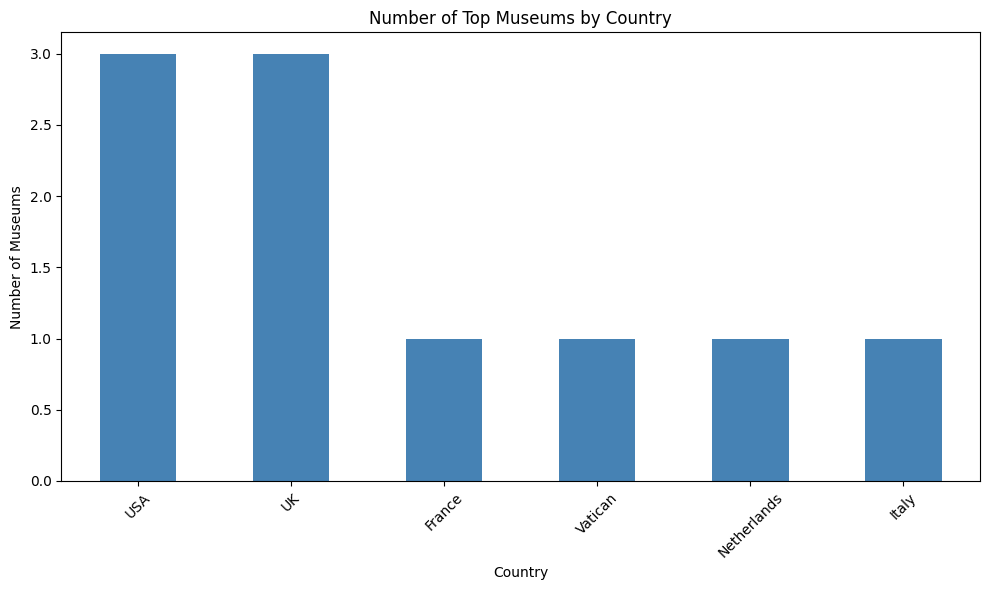

In [25]:
# Bar chart of museums by country
country_counts.plot(kind='bar', title='Number of Top Museums by Country',
                   figsize=(10, 6), color='steelblue')
plt.xlabel('Country')
plt.ylabel('Number of Museums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

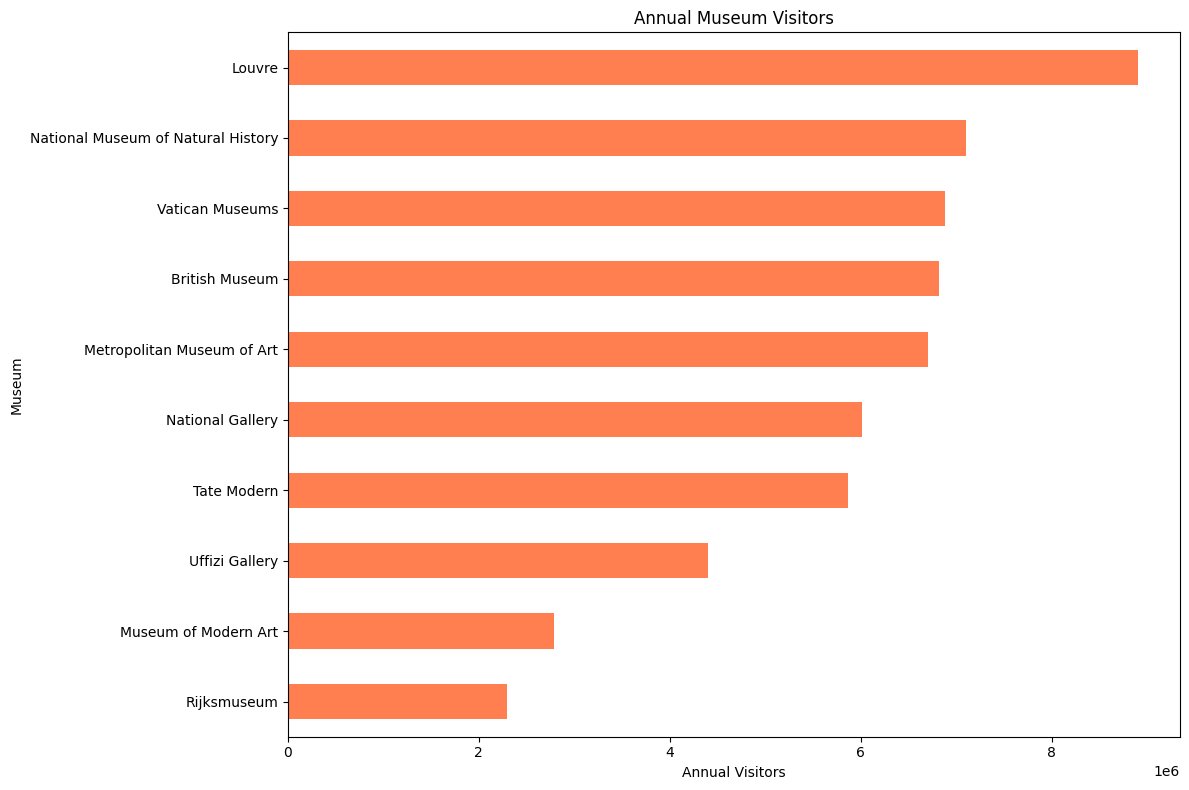

In [26]:
# Horizontal bar chart of annual visitors
visitor_data = museums_df[['museum_name', 'annual_visitors']].sort_values('annual_visitors')
visitor_data.set_index('museum_name')['annual_visitors'].plot(
    kind='barh', title='Annual Museum Visitors', figsize=(12, 8), color='coral'
)
plt.xlabel('Annual Visitors')
plt.ylabel('Museum')
plt.tight_layout()
plt.show()

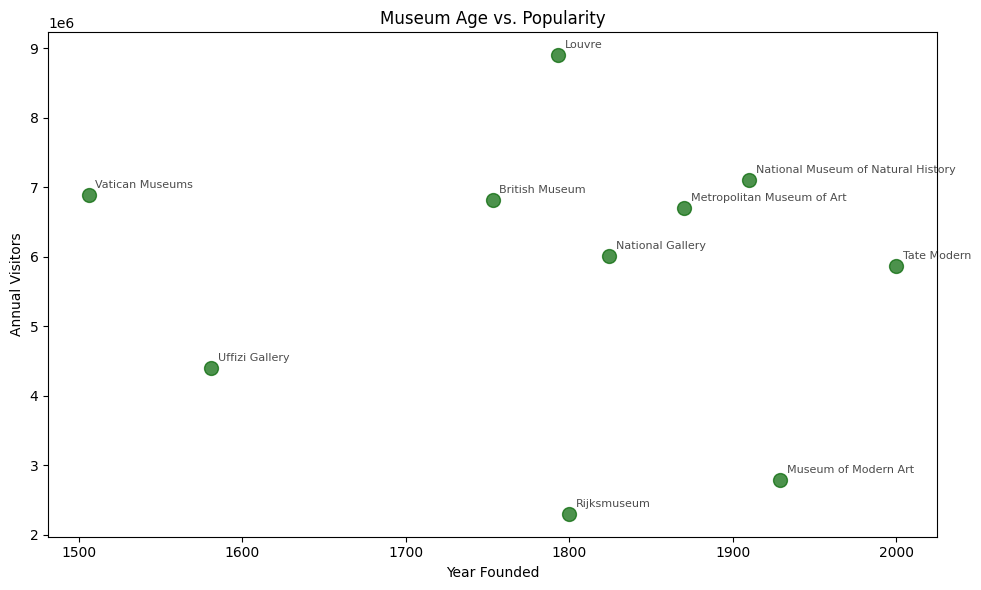

In [27]:
# Scatter plot: founding year vs. annual visitors
plt.figure(figsize=(10, 6))
plt.scatter(museums_df['founded_year'], museums_df['annual_visitors'],
           alpha=0.7, s=100, color='darkgreen')
plt.xlabel('Year Founded')
plt.ylabel('Annual Visitors')
plt.title('Museum Age vs. Popularity')

# Add museum names as labels
for i, txt in enumerate(museums_df['museum_name']):
    plt.annotate(txt, (museums_df['founded_year'].iloc[i], museums_df['annual_visitors'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

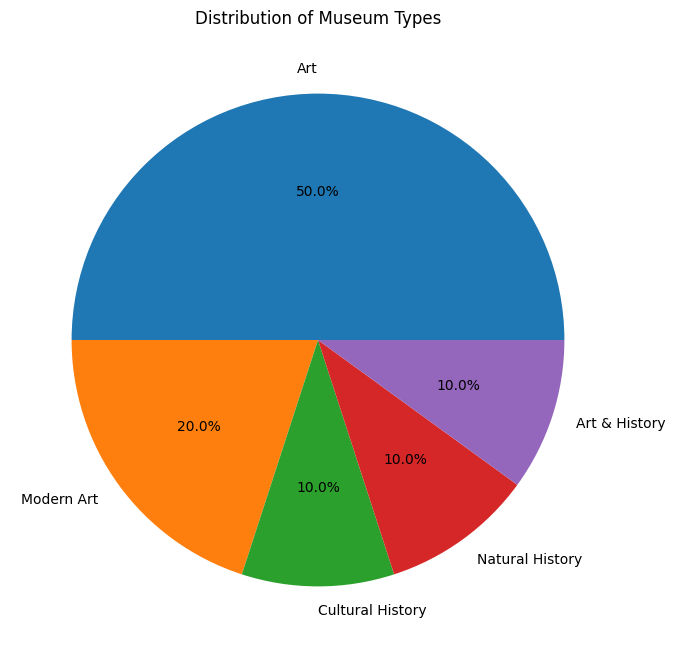

In [28]:
# Pie chart of museum types
type_counts.plot(kind='pie', title='Distribution of Museum Types',
                figsize=(8, 8), autopct='%1.1f%%')
plt.ylabel('')  # Remove the ylabel for pie charts
plt.show()

### 📊 Practice Visualizing Your Data:

Create visualizations for your own found data! Consider what types of charts would best reveal patterns in your cultural dataset.

In [29]:
# Create visualizations for your found data here
# Examples:
# my_found_data['category_column'].value_counts().plot(kind='bar')
# my_found_data['numeric_column'].plot(kind='hist')
# plt.show()

## Part 8: Saving Your Analysis

Once you've analyzed your found data, you'll want to save your results for future use.

In [30]:
# Save a filtered dataset to CSV
# Example: Save only the highly visited museums
popular_museums.to_csv('popular_museums_analysis.csv', index=False)
print("✅ Saved filtered data to CSV file")

✅ Saved filtered data to CSV file


In [31]:
# Save summary statistics
summary_stats = museums_df.describe()
summary_stats.to_csv('museum_summary_statistics.csv')
print("✅ Saved summary statistics")

✅ Saved summary statistics


## Part 9: Your Turn - Complete Data Analysis

Now practice the complete workflow with your own found data or the sample museum data:

1. **Load** your data
2. **Explore** its structure and content
3. **Filter** for interesting subsets
4. **Count** and analyze patterns
5. **Visualize** key findings
6. **Save** your results

### Research Questions to Explore:

For the museum data:
- Is there a relationship between when museums were founded and their current popularity?
- Which countries dominate the world's most visited museums?
- Do certain types of museums attract more visitors?

For your own found data:
- What cultural patterns can you identify?
- How might these patterns reflect broader social, economic, or historical trends?
- What questions does this data raise that you'd want to investigate further?

In [ ]:
# Your complete analysis here!
# Follow the 6-step workflow above


In [ ]:
# More analysis space


In [ ]:
# Final visualizations and insights


## Reflection Questions

Take a moment to reflect on today's work with found data:

1. **Data Discovery**: What surprised you about the cultural patterns in the data?

2. **Methodology**: How did using pandas change your approach to analyzing cultural information compared to just reading about it?

3. **Ethics**: What ethical considerations should cultural researchers keep in mind when using found data?

4. **Limitations**: What can this data tell us, and what can't it tell us about cultural phenomena?

5. **Future Research**: What questions did this analysis raise that you'd want to explore with additional data sources?

*Write your reflections in the markdown cell below*

### My Reflections:

*Write your thoughts here...*


## Next Steps

You've now learned the fundamentals of working with found data using pandas!

### 🎯 Time to Practice!
**Your next step is the Student Practice Notebook:**
- **📝 `WRIT20833_HW3-1_Found_Data_Practice_F25.ipynb`** (in the homework folder)
- Apply these pandas fundamentals to your own cultural dataset
- Complete guided exercises with real cultural data
- Reflect on cultural patterns and research ethics
- Submit your completed analysis

### 🚀 Coming Next:
In our next codeAlong session, we'll explore advanced techniques:

- **Data Cleaning**: Handling messy, real-world cultural datasets
- **String Manipulation**: Processing text data from cultural sources
- **Grouping and Aggregation**: Comparing patterns across categories
- **Advanced Filtering**: Complex queries for cultural analysis

### 💡 Practice Tips:
**Some suggested cultural datasets to explore for your practice notebook:**
- Film and movie databases (Kaggle: "TMDB 5000 Movie Dataset")
- Music and streaming data (Kaggle: "Spotify Dataset")
- Museum collections (many museums have open APIs)
- Historical census or demographic data
- Arts funding and grants data
- Library circulation or book popularity data

**Remember**: Choose a dataset that matches the requirements outlined in your practice notebook for the best learning experience!